<a href="https://colab.research.google.com/github/mamun216/ML_Models/blob/master/Travel_insurance_claim_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the data
Travel insurance is a type of insurance that covers the costs and losses associated with traveling. It is useful protection for those traveling domestically or abroad.

Many companies selling tickets or travel packages, give consumers the option to purchase travel insurance, also known as travelers insurance. Some travel policies cover damage to personal property, rented equipment, such as rental cars, or even the cost of paying a ransom. 


There are 11 columns in the dataset. Some of them are mentioned below:

*   Duration : Travel duration
*   Destination : Travel destination
*   Agency : Agency name
*   Commission: Commission on the insurance
*   Age: Age of the insurance buyer
*   Gender: Gender of the insurance buyer
*   Agency Type: What is the agency type?
*   Net Sales: Net sales
*   Distribution Channel: offline/online
*   Product Name: Name of the insurance plan
*   Claim: If the insurance is claimed or not (the target variable), 0 = not claimed, 1 = claimed






# Problem Statement
As a data scientist in an insurance company in the USA has to collect the data of earlier travel insurance buyers and to identify which person will claim their travel insurance and who will not by using machine learning model.

# Loading important libraries for data handling

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics

from sklearn import preprocessing

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.model_selection import train_test_split

from sklearn import ensemble
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


In [2]:
insurance_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Training_set_label.csv" )
insurance_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61,UNITED KINGDOM,19.8,11.88,NaN,29,0
1,EPX,Travel Agency,Online,Cancellation Plan,93,NEW ZEALAND,63.0,0.00,NaN,36,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22,UNITED STATES,22.0,0.00,NaN,25,0
3,C2B,Airlines,Online,Silver Plan,14,SINGAPORE,54.5,13.63,M,24,0
4,EPX,Travel Agency,Online,Cancellation Plan,90,VIET NAM,10.0,0.00,NaN,23,0


# Remove column space

In [3]:
insurance_data.columns = insurance_data.columns.str.replace(' ', '_')
insurance_data.columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Duration', 'Destination', 'Net_Sales', 'Commision_(in_value)',
       'Gender', 'Age', 'Claim'],
      dtype='object')

# Checking number of observations in dataset and data type

In [4]:
insurance_data.shape

(48260, 11)

In [5]:
insurance_data.dtypes

Agency                   object
Agency_Type              object
Distribution_Channel     object
Product_Name             object
Duration                  int64
Destination              object
Net_Sales               float64
Commision_(in_value)    float64
Gender                   object
Age                       int64
Claim                     int64
dtype: object

In [6]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48260 entries, 0 to 48259
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                48260 non-null  object 
 1   Agency_Type           48260 non-null  object 
 2   Distribution_Channel  48260 non-null  object 
 3   Product_Name          48260 non-null  object 
 4   Duration              48260 non-null  int64  
 5   Destination           48260 non-null  object 
 6   Net_Sales             48260 non-null  float64
 7   Commision_(in_value)  48260 non-null  float64
 8   Gender                13899 non-null  object 
 9   Age                   48260 non-null  int64  
 10  Claim                 48260 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.1+ MB


# Finding missing values and filling missing values

In [7]:
insurance_data.isnull().sum()

Agency                      0
Agency_Type                 0
Distribution_Channel        0
Product_Name                0
Duration                    0
Destination                 0
Net_Sales                   0
Commision_(in_value)        0
Gender                  34361
Age                         0
Claim                       0
dtype: int64

In [8]:
null_percent = (insurance_data.isnull().sum()/len(insurance_data))*100
null_percent

Agency                   0.000000
Agency_Type              0.000000
Distribution_Channel     0.000000
Product_Name             0.000000
Duration                 0.000000
Destination              0.000000
Net_Sales                0.000000
Commision_(in_value)     0.000000
Gender                  71.199751
Age                      0.000000
Claim                    0.000000
dtype: float64

Since we have more than 71% null values in gender column , so will remove the gender column

In [9]:
insurance_data.drop(['Gender'], axis = 1, inplace = True)
insurance_data.isnull().sum()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Duration                0
Destination             0
Net_Sales               0
Commision_(in_value)    0
Age                     0
Claim                   0
dtype: int64

# Numerical data descrription to see mean, std.dev, min, max, quartile percent, etc.

In [10]:
insurance_data.describe()

,Duration,Net_Sales,Commision_(in_value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.546602,40.747647,9.811735,39.927269,0.014671
std,104.828147,48.823217,19.695339,14.027329,0.120231
min,-2.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,43.000000,0.000000
max,4881.000000,666.000000,262.760000,118.000000,1.000000


AS we can see from above data descrption duration has the negative value and age is max 118. we can ignore the negative value by droping and age over 100 that value is not normal, also dropped that value.

In [11]:
insurance_data.loc[insurance_data['Duration'] < 0, 'Duration'] = 52.436
insurance_data.loc[insurance_data['Age'] > 100, 'Age'] = 39.7895
insurance_data.describe()

,Duration,Net_Sales,Commision_(in_value),Age,Claim
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,49.549944,40.747647,9.811735,38.706952,0.014671
std,104.827382,48.823217,19.695339,10.008467,0.120231
min,0.000000,-389.000000,0.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000,0.000000
50%,22.000000,27.000000,0.000000,36.000000,0.000000
75%,53.000000,48.000000,11.630000,42.000000,0.000000
max,4881.000000,666.000000,262.760000,88.000000,1.000000


# Find out target column data balance

In [12]:
print("Claimed")
print(insurance_data[insurance_data["Claim"] == 1]["Claim"].count())
print("Not Claimed")
print(insurance_data[insurance_data["Claim"] == 0]["Claim"].count())

Claimed
708
Not Claimed
47552


Imbalanced dataset appears here. Oversample method will be performed to deal with imblancing problems. Before resampling, data visualization is executed first to know potential relationship.

# Data Visualization

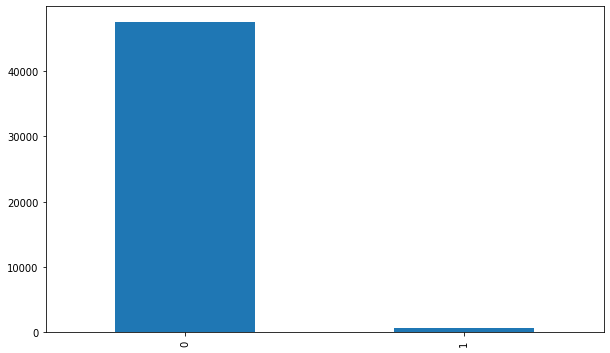

In [13]:
insurance_data['Claim'].value_counts().plot(kind= 'bar', figsize = (10,6));

We can see that data is so imbalanced.

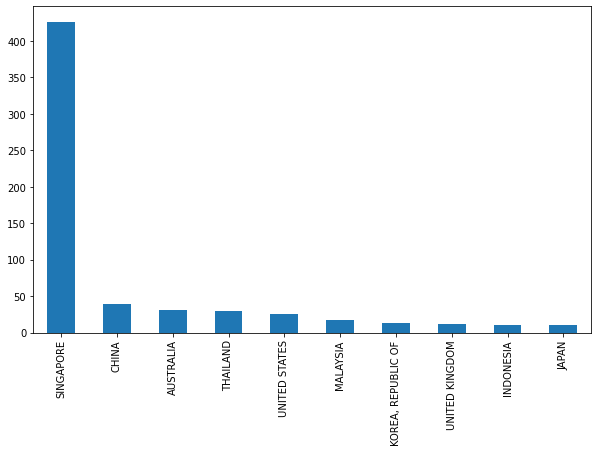

In [14]:
claim_data = insurance_data[insurance_data['Claim']==1]
claim_data['Destination'].value_counts().head(10).plot(kind='bar', figsize =(10,6));

The above visualization shows Country Singapore has the abindance of claimed policies that means, this country might have some of unavoidable situtation that lead to injury or disease.

In the below graph, we want to discover whether specific agency companies lead to an increase in the numbers of claimed policies. 
In this figure, clearly no moral hazard happens here. Since in general one, EPX has more sold policies, but it does not lead to more claimed policies.

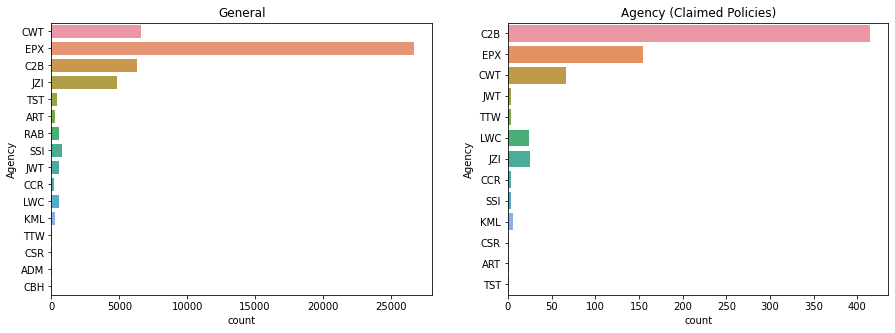

In [15]:
f, axes = plt.subplots(1, 2)
f.set_size_inches(15,5)
axes[0].set_title('General')
axes[1].set_title('Agency (Claimed Policies)')
sns.countplot(y="Agency", data=insurance_data, ax = axes[0])
sns.countplot(y="Agency", data=claim_data, ax = axes[1]);

Different policy plans have different coverage. Some of plans cover most of types of injury or disease, so the possibility of claims



In [16]:
a = pd.DataFrame(insurance_data.loc[:, "Product_Name"].value_counts())
b = pd.DataFrame(claim_data.loc[:, "Product_Name"].value_counts())
combined = a.join(b, lsuffix = "_general", rsuffix = "_claimed")
combined.fillna(0, inplace = True)
combined

,Product_Name_general,Product_Name_claimed
Cancellation Plan,14202,37.0
2 way Comprehensive Plan,10000,110.0
Rental Vehicle Excess Insurance,6572,66.0
Basic Plan,4209,18.0
Bronze Plan,3057,152.0
1 way Comprehensive Plan,2510,8.0
Value Plan,2082,16.0
Silver Plan,1705,105.0
Annual Silver Plan,1088,122.0
Ticket Protector,807,4.0


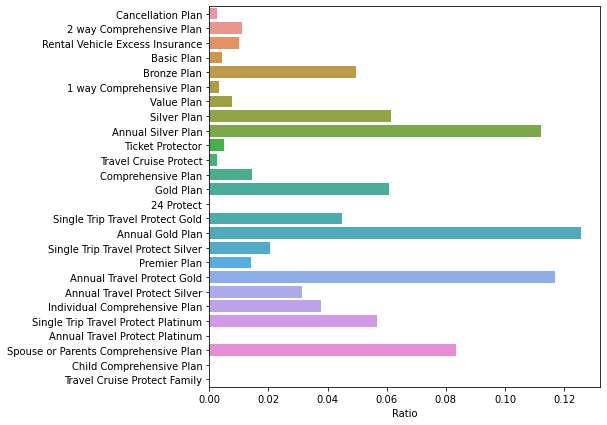

In [17]:
ratio_list = []
for i in range(len(combined)):
    ratio_list.append(combined.iloc[i][1] / combined.iloc[i][0])
ratio = pd.DataFrame(ratio_list, index = np.array(combined.index))
ratio = ratio.rename(columns = {0:"Ratio"})

plt.figure(figsize=(7,7))
sns.barplot(data = ratio, y = ratio.index, x = "Ratio");

From the above Ratio figure, we know different policies have different rate of being claimed.

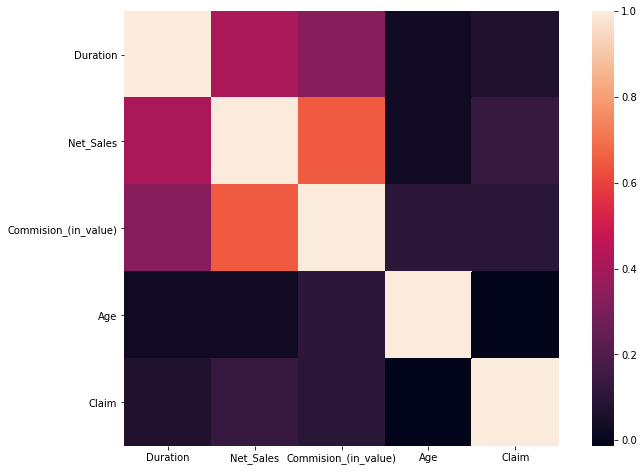

In [18]:
plt.figure(figsize = (12,8));
sns.heatmap(insurance_data.corr(), square=True);

# Data preprocessing for modelling

In [19]:
insurance_data.head()

,Agency,Agency_Type,Distribution_Channel,Product_Name,Duration,Destination,Net_Sales,Commision_(in_value),Age,Claim
0,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,61.0,UNITED KINGDOM,19.8,11.88,29.0,0
1,EPX,Travel Agency,Online,Cancellation Plan,93.0,NEW ZEALAND,63.0,0.00,36.0,0
2,EPX,Travel Agency,Online,2 way Comprehensive Plan,22.0,UNITED STATES,22.0,0.00,25.0,0
3,C2B,Airlines,Online,Silver Plan,14.0,SINGAPORE,54.5,13.63,24.0,0
4,EPX,Travel Agency,Online,Cancellation Plan,90.0,VIET NAM,10.0,0.00,23.0,0


# One Hot Encoding (Creating dummies for categorical columns)

In [20]:
cat_cols = ['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name', 'Destination']
insurance_data = pd.get_dummies(insurance_data, columns = cat_cols)
insurance_data.head()

,Duration,Net_Sales,Commision_(in_value),Age,Claim,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,...,Destination_PORTUGAL,Destination_PUERTO RICO,Destination_QATAR,Destination_REPUBLIC OF MONTENEGRO,Destination_REUNION,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_SAMOA,Destination_SAUDI ARABIA,Destination_SERBIA,Destination_SEYCHELLES,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOLOMON ISLANDS,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA","Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TIBET,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKMENISTAN,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_URUGUAY,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,"Destination_VIRGIN ISLANDS, U.S.",Destination_ZAMBIA,Destination_ZIMBABWE
0,61.0,19.8,11.88,29.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,93.0,63.0,0.00,36.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,22.0,22.0,0.00,25.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,14.0,54.5,13.63,24.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,90.0,10.0,0.00,23.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Normalization

In [21]:
def scale_feat(df,cont_feat) :
    df1=df
    scaler = preprocessing.RobustScaler()
    df1[cont_feat] = scaler.fit_transform(df1[cont_feat])
    return df1

In [22]:
cont_feat = list(set(insurance_data.columns) -{'Claim'})
df=scale_feat(insurance_data,cont_feat)

In [23]:
df[cont_feat].describe()

,Destination_AZERBAIJAN,Destination_BULGARIA,Destination_ESTONIA,Agency_LWC,Destination_ISRAEL,Agency_ADM,Destination_ECUADOR,Destination_OMAN,Product_Name_Silver Plan,Destination_TUNISIA,Destination_GUINEA-BISSAU,Destination_MACAO,Destination_KAZAKHSTAN,Destination_PAPUA NEW GUINEA,Destination_JAPAN,Destination_BELARUS,Product_Name_Bronze Plan,Destination_GUADELOUPE,Agency_SSI,Destination_REPUBLIC OF MONTENEGRO,Destination_ANGOLA,Destination_PAKISTAN,Destination_TIBET,Destination_TURKEY,Destination_ETHIOPIA,Product_Name_Annual Travel Protect Gold,Destination_NORTHERN MARIANA ISLANDS,Destination_KUWAIT,Destination_GUAM,Destination_AUSTRIA,Agency_JZI,Product_Name_Spouse or Parents Comprehensive Plan,Destination_MALDIVES,Product_Name_Individual Comprehensive Plan,Destination_BRAZIL,Destination_POLAND,Destination_SWITZERLAND,Destination_PANAMA,Destination_UZBEKISTAN,Product_Name_Travel Cruise Protect,...,Product_Name_Gold Plan,Destination_BOTSWANA,Destination_THAILAND,Destination_CAMBODIA,Destination_KYRGYZSTAN,Destination_VENEZUELA,Distribution_Channel_Online,Agency_EPX,Destination_PUERTO RICO,Destination_MYANMAR,Destination_IRELAND,Destination_BOSNIA AND HERZEGOVINA,Destination_REUNION,Destination_LIBYAN ARAB JAMAHIRIYA,Destination_CANADA,Destination_GUATEMALA,Destination_VANUATU,Destination_UNITED STATES,Destination_TRINIDAD AND TOBAGO,Agency_CCR,Destination_HUNGARY,Product_Name_Annual Travel Protect Silver,Destination_RUSSIAN FEDERATION,Destination_CHINA,Destination_UNITED ARAB EMIRATES,Destination_SOLOMON ISLANDS,Destination_KENYA,Destination_LUXEMBOURG,Destination_ZAMBIA,Product_Name_Comprehensive Plan,Destination_CROATIA,Destination_FRENCH POLYNESIA,Destination_SOUTH AFRICA,Destination_GUINEA,Product_Name_Cancellation Plan,Destination_NIGERIA,Destination_GREECE,"Destination_VIRGIN ISLANDS, U.S.",Agency_C2B,Destination_ITALY
count,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.00000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,...,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.00000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000,48260.000000
mean,0.000104,0.000186,0.000104,0.011024,0.000663,0.001160,0.000104,0.000269,0.035329,0.000104,0.000021,0.001823,0.000269,0.000186,0.033112,0.000041,0.063344,0.000021,0.016722,0.000021,0.000021,0.000414,0.000021,0.001243,0.000104,0.001596,0.000021,0.000104,0.000104,0.001699,0.100518,0.000249,0.000373,0.001098,0.00058,0.000497,0.003958,0.000041,0.000166,0.008040,...,0.005781,0.000021,0.093431,0.007729,0.000124,0.000104,-0.017116,-0.446498,0.000062,0.012702,0.001989,0.000021,0.000041,0.000021,0.008661,0.000021,0.000083,0.040282,0.000062,0.003212,0.000332,0.001326,0.001347,0.075466,0.004414,0.000021,0.00029,0.000145,0.000041,0.005781,0.000808,0.000041,0.002632,0.000041,0.294281,0.000021,0.001823,0.000021,0.130128,0.007190
std,0.010178,0.013655,0.010178,0.104414,0.025742,0.034045,0.010178,0.016411,0.184613,0.010178,0.004552,0.042663,0.016411,0.013655,0.178932,0.006437,0.243584,0.004552,0.128229,0.004552,0.004552,0.020353,0.004552,0.035238,0.010178,0.039913,0.004552,0.010178,0.010178,0.041186,0.300693,0.015767,0.019309,0.033122,0.02408,0.022295,0.062787,0.006437,0.012874,0.089305,

In [24]:
df.shape

(48260, 192)

In [25]:
df.Claim.value_counts()

0    47552
1      708
Name: Claim, dtype: int64

# Seperate input features and output features

In [26]:
X = df.drop(['Claim'], axis=1)
y = df.Claim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Over sampling

In [27]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train, y_train = smote.fit_sample(X_train, y_train)
X_test, y_test = smote.fit_sample(X_test, y_test)

In [28]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((76122, 191), (76122,), (18982, 191), (18982,))

# Building model

# Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lm = LogisticRegression()
logistic_model = lm.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix
predictions_LM = logistic_model.predict(X_test)
print('Classification Report Logistic Regression')
print(classification_report(y_test,predictions_LM))
print('Confusion Matrix Logistic Regression')
print(confusion_matrix(y_test,predictions_LM))

Classification Report Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      9491
           1       0.78      0.74      0.76      9491

    accuracy                           0.77     18982
   macro avg       0.77      0.77      0.77     18982
weighted avg       0.77      0.77      0.77     18982

Confusion Matrix Logistic Regression
[[7502 1989]
 [2464 7027]]


# Random forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=25, class_weight="balanced")
clf_RF.fit(X_train,y_train)
predictions_RF = clf_RF.predict(X_test)
print('Classification Report RandomForest Classifier')
print(confusion_matrix(y_test,predictions_RF))
print('\n Confusion Matrix RandomForest Classifier')
print(classification_report(y_test,predictions_RF))

Classification Report RandomForest Classifier
[[9284  207]
 [3448 6043]]

 Confusion Matrix RandomForest Classifier
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      9491
           1       0.97      0.64      0.77      9491

    accuracy                           0.81     18982
   macro avg       0.85      0.81      0.80     18982
weighted avg       0.85      0.81      0.80     18982



# KNN classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=2)
clf_KNN.fit(X_train,y_train)
predictions_KNN = clf_KNN.predict(X_test)
print('Classification Report Nearest Neighbors')
print(confusion_matrix(y_test,predictions_KNN))
print('\nConfusion Matrix Nearest Neighbors')
print(classification_report(y_test,predictions_KNN))

Classification Report Nearest Neighbors
[[9044  447]
 [6594 2897]]

Confusion Matrix Nearest Neighbors
              precision    recall  f1-score   support

           0       0.58      0.95      0.72      9491
           1       0.87      0.31      0.45      9491

    accuracy                           0.63     18982
   macro avg       0.72      0.63      0.59     18982
weighted avg       0.72      0.63      0.59     18982



# XGBoost: Extreme Gradient Boosting

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

#Prédiction
y_xgb = xgb.predict(X_test)

In [33]:
from sklearn.metrics import f1_score
print('f1-score : ', f1_score(y_test, y_xgb))

f1-score :  0.8698259085888602


# Best feature selection

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

In [35]:
selector = SelectKBest(f_classif, k=10)     # Let's say we select 10 best features

In [36]:
X_new = selector.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

In [37]:
clf_RF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
clf_RF.score(X_test, y_test)

0.8337132200580191

# Testing data

In [39]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/travel_insurance/Testing_set_label.csv')
test_data.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,EPX,Travel Agency,Online,Cancellation Plan,24,HONG KONG,27.0,0.0,NaN,36
1,EPX,Travel Agency,Online,Cancellation Plan,51,JAPAN,45.0,0.0,NaN,36
2,EPX,Travel Agency,Online,Cancellation Plan,52,JAPAN,21.0,0.0,NaN,21
3,EPX,Travel Agency,Online,Cancellation Plan,89,SINGAPORE,11.0,0.0,NaN,30
4,EPX,Travel Agency,Online,Cancellation Plan,5,MALAYSIA,10.0,0.0,NaN,33


In [40]:
test_data.drop(['Gender'], axis = 1, inplace = True)

In [41]:
test_data.columns = test_data.columns.str.replace(' ', '_')
test_data.columns

Index(['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name',
       'Duration', 'Destination', 'Net_Sales', 'Commision_(in_value)', 'Age'],
      dtype='object')

In [42]:
test_data.isnull().sum()

Agency                  0
Agency_Type             0
Distribution_Channel    0
Product_Name            0
Duration                0
Destination             0
Net_Sales               0
Commision_(in_value)    0
Age                     0
dtype: int64

In [43]:
test_data.describe()

,Duration,Net_Sales,Commision_(in_value),Age
count,15832.000000,15832.000000,15832.000000,15832.000000
mean,48.597966,40.616091,9.790929,40.081417
std,90.736355,49.031862,20.050776,13.949511
min,-1.000000,-357.500000,0.000000,1.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.000000,0.000000,36.000000
75%,53.000000,48.000000,10.640000,44.000000
max,4784.000000,810.000000,283.500000,118.000000


In [44]:
test_data.loc[test_data['Duration'] < 0, 'Duration'] = 52.436
test_data.loc[test_data['Age'] > 100, 'Age'] = 39.7895
test_data.describe()

,Duration,Net_Sales,Commision_(in_value),Age
count,15832.000000,15832.000000,15832.000000,15832.000000
mean,48.604717,40.616091,9.790929,38.895811
std,90.734652,49.031862,20.050776,10.056968
min,0.000000,-357.500000,0.000000,1.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.000000,0.000000,36.000000
75%,53.000000,48.000000,10.640000,43.000000
max,4784.000000,810.000000,283.500000,85.000000


In [45]:
cat_cols = ['Agency', 'Agency_Type', 'Distribution_Channel', 'Product_Name', 'Destination']
test_data = pd.get_dummies(test_data, columns = cat_cols)
test_data.head()

,Duration,Net_Sales,Commision_(in_value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_Premier Plan,...,Destination_OMAN,Destination_PAKISTAN,Destination_PANAMA,Destination_PAPUA NEW GUINEA,Destination_PERU,Destination_PHILIPPINES,Destination_POLAND,Destination_PORTUGAL,Destination_QATAR,Destination_ROMANIA,Destination_RUSSIAN FEDERATION,Destination_RWANDA,Destination_SAUDI ARABIA,Destination_SENEGAL,Destination_SIERRA LEONE,Destination_SINGAPORE,Destination_SLOVENIA,Destination_SOUTH AFRICA,Destination_SPAIN,Destination_SRI LANKA,Destination_SWEDEN,Destination_SWITZERLAND,"Destination_TAIWAN, PROVINCE OF CHINA",Destination_TAJIKISTAN,"Destination_TANZANIA, UNITED REPUBLIC OF",Destination_THAILAND,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKS AND CAICOS ISLANDS,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VIET NAM,Destination_ZAMBIA,Destination_ZIMBABWE
0,24.0,27.0,0.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,51.0,45.0,0.0,36.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,52.0,21.0,0.0,21.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,89.0,11.0,0.0,30.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,10.0,0.0,33.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
cont_feat = list(set(test_data.columns))
df2=scale_feat(test_data,cont_feat)

df2[cont_feat].describe()

,Destination_AZERBAIJAN,Destination_BULGARIA,Destination_ESTONIA,Agency_LWC,Destination_ISRAEL,Agency_ADM,Destination_ECUADOR,Destination_OMAN,Product_Name_Silver Plan,Destination_TUNISIA,Destination_MACAO,Destination_PAPUA NEW GUINEA,Destination_KAZAKHSTAN,Destination_JAPAN,Destination_BELARUS,Product_Name_Bronze Plan,Agency_SSI,Destination_TURKEY,Destination_PAKISTAN,Destination_SENEGAL,Destination_SIERRA LEONE,Destination_ETHIOPIA,Product_Name_Annual Travel Protect Gold,Destination_NORTHERN MARIANA ISLANDS,Destination_KUWAIT,Destination_RWANDA,Destination_GUAM,Destination_AUSTRIA,Agency_JZI,Product_Name_Spouse or Parents Comprehensive Plan,Destination_MALDIVES,Product_Name_Individual Comprehensive Plan,Destination_BRAZIL,Destination_POLAND,Destination_SWITZERLAND,Destination_PANAMA,Destination_UZBEKISTAN,Product_Name_Travel Cruise Protect,Destination_MAURITIUS,Destination_NEW ZEALAND,...,Destination_UKRAINE,Destination_UNITED KINGDOM,Product_Name_Premier Plan,Destination_NETHERLANDS,Destination_DENMARK,Agency_ART,Agency_CWT,Destination_FRANCE,Destination_BAHRAIN,Destination_ZIMBABWE,Destination_NORWAY,Product_Name_Gold Plan,Destination_THAILAND,Destination_CAMBODIA,Distribution_Channel_Online,Agency_EPX,Destination_MYANMAR,Destination_IRELAND,Destination_CANADA,Destination_VANUATU,Destination_UNITED STATES,Destination_TRINIDAD AND TOBAGO,Agency_CCR,Destination_HUNGARY,Product_Name_Annual Travel Protect Silver,Destination_RUSSIAN FEDERATION,Destination_CHINA,Destination_UNITED ARAB EMIRATES,Destination_KENYA,Destination_LUXEMBOURG,Destination_ZAMBIA,Product_Name_Comprehensive Plan,Destination_CROATIA,Destination_NEW CALEDONIA,Destination_SOUTH AFRICA,Destination_GUINEA,Product_Name_Cancellation Plan,Destination_GREECE,Agency_C2B,Destination_ITALY
count,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,...,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000,15832.000000
mean,0.000189,0.000189,0.000253,0.010485,0.001011,0.001642,0.000126,0.000316,0.036382,0.000126,0.001390,0.000189,0.000126,0.031203,0.000063,0.065627,0.016170,0.001263,0.000568,0.000063,0.000063,0.000063,0.001453,0.000063,0.000189,0.000063,0.000253,0.001390,0.098724,0.000189,0.000505,0.001326,0.000568,0.000695,0.005811,0.000126,0.000126,0.008969,0.000189,0.007516,...,0.000126,0.020907,0.003284,0.005369,0.001390,0.005558,0.133780,0.007769,0.000379,0.000126,0.002211,0.004864,0.093292,0.008085,-0.018317,-0.442458,0.013012,0.001832,0.007327,0.000063,0.038593,0.000063,0.002590,0.000442,0.001453,0.001011,0.076806,0.004737,0.000505,0.000126,0.000063,0.005685,0.001074,0.000063,0.002400,0.000126,0.293204,0.001453,0.132264,0.007074
std,0.013765,0.013765,0.015894,0.101862,0.031775,0.040493,0.011239,0.017769,0.187245,0.011239,0.037252,0.013765,0.011239,0.173870,0.007948,0.247636,0.126132,0.035521,0.023837,0.007948,0.007948,0.007948,0.038089,0.007948,0.013765,0.007948,0.015894,0.037252,0.298301,0.013765,0.022474,0.036397,0.023837,0.026351,0.076011,0.011239,0.011239,0.094283,0.013765,0.086374,...,0.011239,0.143078,0.057218,0.073078,0.037252,0.074349,0.340426,0.087802,

In [47]:
feature_difference = set(df) - set(df2)

feature_difference_df = pd.DataFrame(data=np.zeros((df2.shape[0], len(feature_difference))),
                                     columns=list(feature_difference))
df2 = df2.join(feature_difference_df)
df2.head()


,Duration,Net_Sales,Commision_(in_value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_Premier Plan,...,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VIET NAM,Destination_ZAMBIA,Destination_ZIMBABWE,Destination_ALBANIA,Destination_MALI,Claim,Destination_TURKMENISTAN,Destination_BOTSWANA,Destination_SERBIA,Destination_KYRGYZSTAN,Destination_SEYCHELLES,Destination_GUINEA-BISSAU,Destination_VENEZUELA,Destination_PUERTO RICO,Destination_GUADELOUPE,Destination_REPUBLIC OF MONTENEGRO,Destination_ANGOLA,Destination_TIBET,Destination_BOSNIA AND HERZEGOVINA,Destination_CAYMAN ISLANDS,Destination_SAMOA,Destination_BENIN,Destination_REUNION,Destination_LIBYAN ARAB JAMAHIRIYA,Destination_URUGUAY,Destination_BARBADOS,Destination_GUATEMALA,Destination_DOMINICAN REPUBLIC,Product_Name_Travel Cruise Protect Family,Destination_BHUTAN,Destination_ARMENIA,Destination_SOLOMON ISLANDS,Destination_CHILE,Destination_FRENCH POLYNESIA,"Destination_KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",Destination_NIGERIA,"Destination_VIRGIN ISLANDS, U.S."
0,0.045455,0.033333,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.659091,0.633333,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,-0.166667,0.0,-1.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.522727,-0.500000,0.0,-0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.386364,-0.533333,0.0,-0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df3=df2.iloc[:,:191]
df3.head()

,Duration,Net_Sales,Commision_(in_value),Age,Agency_ADM,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,Agency_EPX,Agency_JWT,Agency_JZI,Agency_KML,Agency_LWC,Agency_RAB,Agency_SSI,Agency_TST,Agency_TTW,Agency_Type_Airlines,Agency_Type_Travel Agency,Distribution_Channel_Offline,Distribution_Channel_Online,Product_Name_1 way Comprehensive Plan,Product_Name_2 way Comprehensive Plan,Product_Name_24 Protect,Product_Name_Annual Gold Plan,Product_Name_Annual Silver Plan,Product_Name_Annual Travel Protect Gold,Product_Name_Annual Travel Protect Platinum,Product_Name_Annual Travel Protect Silver,Product_Name_Basic Plan,Product_Name_Bronze Plan,Product_Name_Cancellation Plan,Product_Name_Child Comprehensive Plan,Product_Name_Comprehensive Plan,Product_Name_Gold Plan,Product_Name_Individual Comprehensive Plan,Product_Name_Premier Plan,...,Destination_THAILAND,Destination_TRINIDAD AND TOBAGO,Destination_TUNISIA,Destination_TURKEY,Destination_TURKS AND CAICOS ISLANDS,Destination_UGANDA,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VIET NAM,Destination_ZAMBIA,Destination_ZIMBABWE,Destination_ALBANIA,Destination_MALI,Claim,Destination_TURKMENISTAN,Destination_BOTSWANA,Destination_SERBIA,Destination_KYRGYZSTAN,Destination_SEYCHELLES,Destination_GUINEA-BISSAU,Destination_VENEZUELA,Destination_PUERTO RICO,Destination_GUADELOUPE,Destination_REPUBLIC OF MONTENEGRO,Destination_ANGOLA,Destination_TIBET,Destination_BOSNIA AND HERZEGOVINA,Destination_CAYMAN ISLANDS,Destination_SAMOA,Destination_BENIN,Destination_REUNION,Destination_LIBYAN ARAB JAMAHIRIYA,Destination_URUGUAY,Destination_BARBADOS,Destination_GUATEMALA,Destination_DOMINICAN REPUBLIC
0,0.045455,0.033333,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.659091,0.633333,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,-0.166667,0.0,-1.875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.522727,-0.500000,0.0,-0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.386364,-0.533333,0.0,-0.375,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
df3.shape


(15832, 191)

In [57]:
predictions_LM = logistic_model.predict(df3)
predictions_LM

array([0, 0, 0, ..., 0, 0, 0])

# Saving Prediction File & Sample Submission

In [58]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(predictions_LM) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = df3.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Conclusion

* We observed that the dataset contained missing values only one column name gender and we removed that column because there was 71% missing values.

* We observed that the dataset was imblanced. We used 'SMOTE' to generate new data to deal with the problem of imbalanced data.

* We had built Random Forest model, got accuracy score of 96.86%.

* Then we selected only 10 most important features using selectKBest and f_classif. Here the model performance was excellent where accuracy increased significantly was about 98.40 %. The best result of model accuracy and f-score.

* Cross Validation gave nearly 98.31% of accurate results which is not bad. 

# References:


Data Pre-processing - Handling missing values and dealing with class imbalance by Bharat Ram Ammu

https://www.kaggle.com/drgilermo/a-tutorial-for-complete-beginners
https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/